# Receptor maps

Goal: Correlate receptor maps from Hansen paper with PC gradients

In [3]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [4]:
import sys, os
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
# from brainspan import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

Attaching package: ‘lemon’



    %||%



    CoordCartesian, element_render




In [5]:
sys.path.append('/home/rajd2/repos/hansen_receptors')

First get the receptor maps in HCP

In [3]:
# %run ../../repos/hansen_receptors/code/parcellate.py
# receptor_path = "/home/rajd2/repos/hansen_receptors/data/PET_parcellated/HCP"

Then combine into a single file with all receptors

In [44]:
# %run ../../repos/hansen_receptors/code/make_receptor_matrix.py

receptors = pd.read_csv("/home/rajd2/repos/hansen_receptors/results/receptor_data_HCP.csv",
            names=np.load("/home/rajd2/repos/hansen_receptors/data/receptor_names_pet.npy"))
receptors = (receptors
             .apply(lambda x: (x-np.mean(x))/np.std(x))
             # .apply(lambda x: -1*x) # flip
             .iloc[:180]
             .set_index(get_labels_hcp()[:180])
             .rename_axis('region')
             #.reset_index()
            )
receptors

,5HT1a,5HT1b,5HT2a,5HT4,5HT6,5HTT,A4B2,CB1,D1,D2,DAT,GABAa,H3,M1,mGluR5,MOR,NET,VAChT
region,,,,,,,,,,,,,,,,,,
V1,-1.414510,1.450233,1.111638,-0.672842,-0.303861,0.895238,-1.732372,-2.072586,-0.160050,-1.522845,0.091763,1.939627,-0.847127,-0.074642,-1.272163,-2.352429,-0.556239,-0.648532
MST,0.870500,-0.142303,0.442070,0.301604,0.656809,0.022836,-0.217474,-1.251993,0.458186,-0.216739,0.467935,1.417069,-1.163996,-0.589638,0.069882,-0.409893,-0.240371,0.064093
V6,-0.962438,-0.576396,-0.830749,-1.014691,-0.255968,-0.324974,-0.813966,-1.378966,-0.943974,-0.922515,-0.270099,0.806548,-1.075138,-0.393576,-0.779450,-1.856863,0.132567,-0.556904
V2,-1.045505,0.049809,0.029207,-0.733458,-0.631466,0.343933,-1.394865,-1.579282,-0.125393,-1.276475,-0.273101,1.589787,-0.883429,-0.606742,-1.094340,-2.174631,-0.479210,-0.695328
V3,-1.205512,-0.817775,0.080203,-0.378302,-0.959303,0.080460,-1.335446,-1.020275,-0.633683,-1.086609,-0.654193,0.831474,-1.118177,-1.014196,-1.374135,-2.075176,-0.487914,-0.874071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STSva,1.969873,-0.248860,0.038667,0.463046,1.263807,-0.485272,-0.728339,0.398656,1.197161,1.650796,0.647658,1.410487,-0.902450,0.231727,0.087577,1.013739,-0.241088,0.171735
TE1m,-0.017526,-0.537233,1.893677,2.044506,1.171005,-0.247097,0.017966,0.910780,-0.545070,1.815393,-0.619723,-0.548044,-0.464565,0.917554,-0.304355,-0.098286,-0.122655,-1.483224
PI,1.814871,-1.234613,-2.297051,-1.792550,0.518010,-0.299031,-1.012855,1.091469,0.747127,1.735037,0.934525,1.152203,-0.071868,-0.359560,-0.789310,0.774699,-0.493145,0.424012


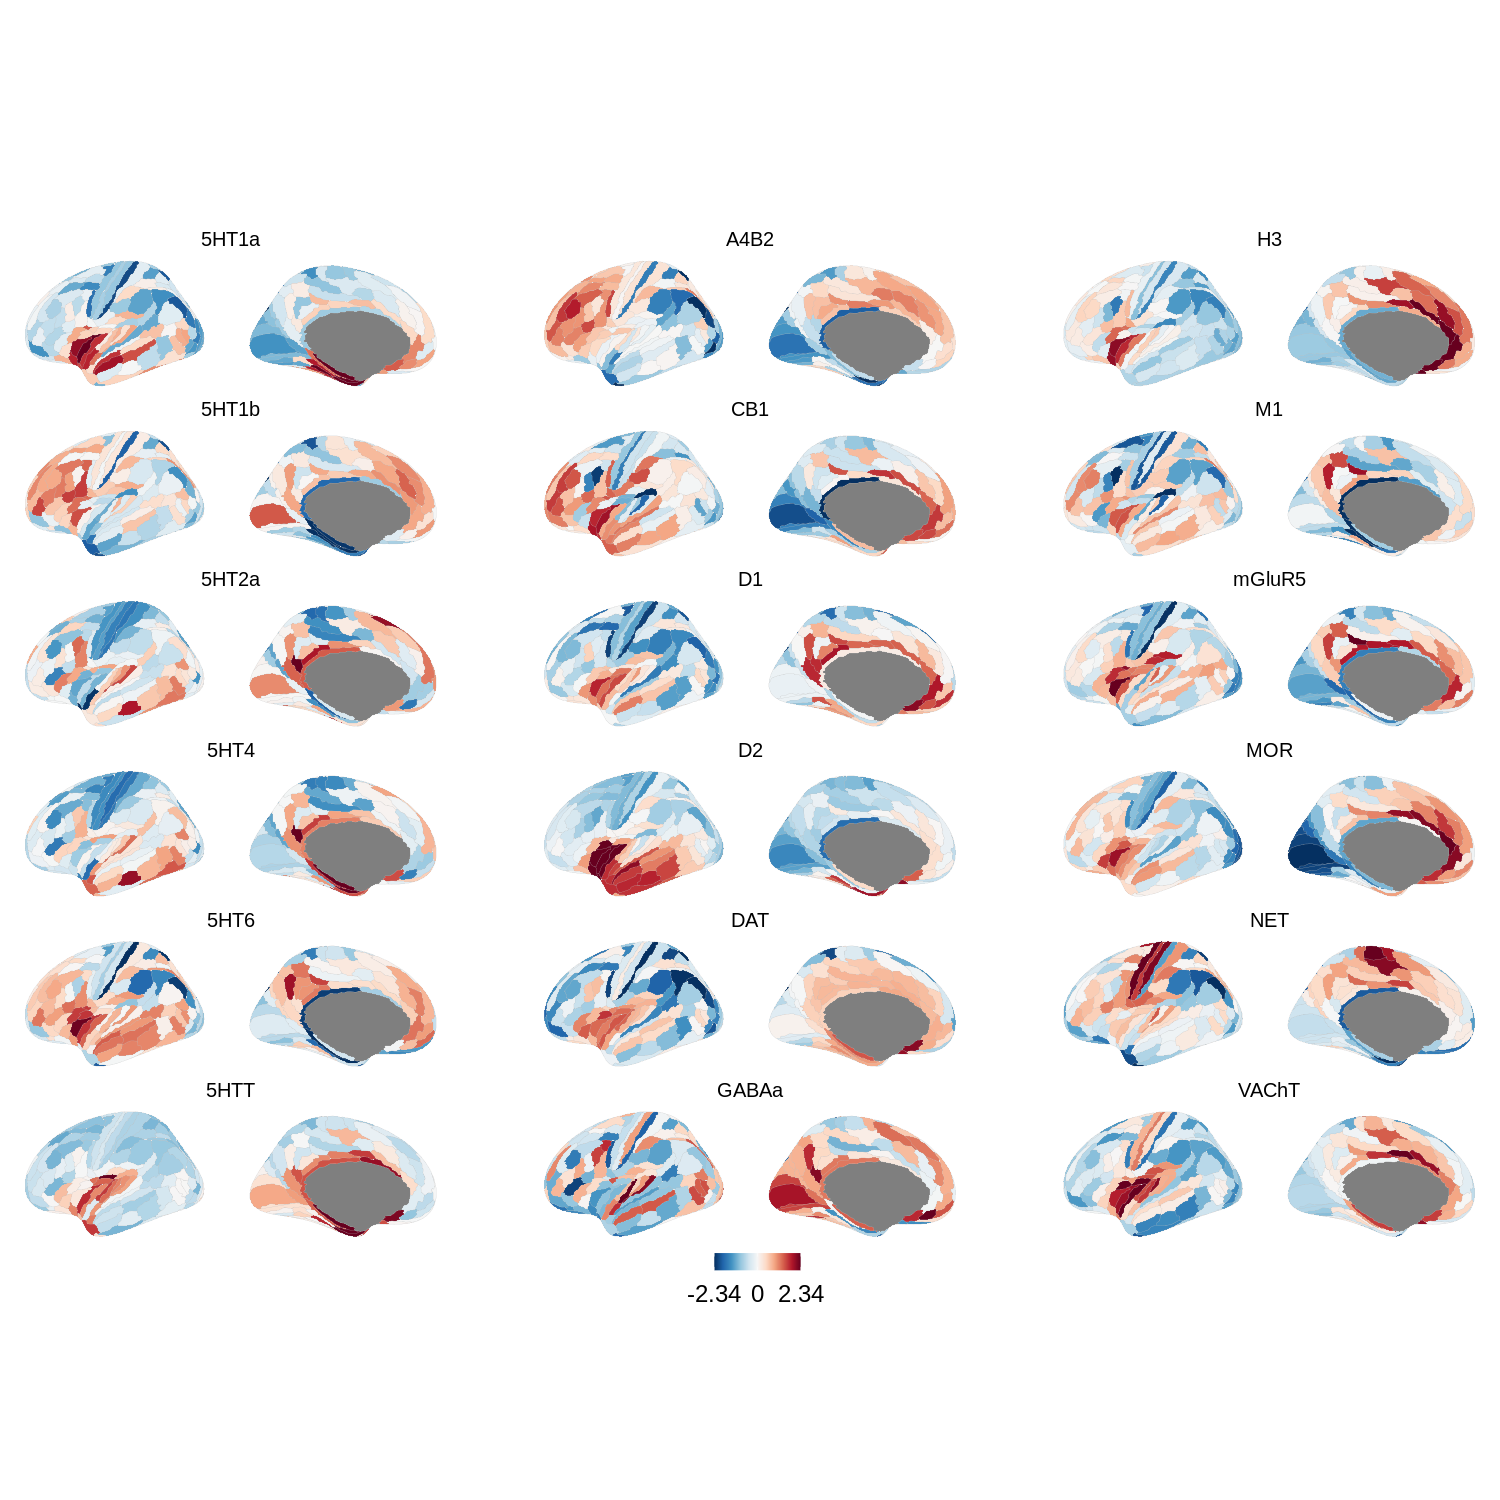

In [47]:
%%R -i receptors -w 1500 -h 1500
source("../code/plot_maps.R")
plot_maps(receptors) & theme(text=element_text(size=30))

Get spins

In [51]:
from netneurotools import freesurfer as nnsurf
from nibabel.freesurfer.io import read_annot

_,_,rh_names = read_annot("../data/rh.HCPMMP1.annot")

spin_receptors = nnsurf.spin_data(
    data = np.array(receptors),
    drop = rh_names,
    version = "fsaverage",
    lhannot = "../data/lh.HCPMMP1.annot",
    rhannot = "../data/rh.HCPMMP1.annot",
    n_rotate = 1000
)
np.save('../outputs/spin_receptors_1000.npy', spin_receptors)
# spin_receptors_1000 = np.load("../outputs/spin_receptors_1000.npy")

/opt/conda/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.


In [66]:
data_dir = "../data/abagen-data/expression/"
hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
# hcp_3donors = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors.csv', index_col=0))
# hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
# hcp_3donors_ds7_mni = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7_mni.csv', index_col=0))
# hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

New PCA version
New PCA version


In [52]:
version = hcp_3donors_ds8
scores = hcp_base.score_from(version).drop([3,4],axis=1).apply(lambda x: (x-np.mean(x))/np.std(x)).join(get_labels_hcp())

corrs = (
    hcp_base.score_from(version).iloc[:,:3]
    .join(receptors.set_index(pd.Series(list(range(180)))+1))
    .corr().iloc[3:,:3]
    # .reset_index()
    .set_axis([f'PC{i+1}' for i in range(3)], axis=1)
)

In [70]:
scores = hcp_base.score_from(hcp_3donors_ds8).iloc[:,:3]
spins_maps = spin_receptors

spin_corrs = {}
for m in range(spins_maps.shape[1]):
    spins = pd.DataFrame(spins_maps[:,m,:], index=list(range(1,181)))
    spin_corrs[receptors.columns[m]] = pd.concat([scores, spins], axis=1).corr().iloc[3:,:3]
spin_corrs = pd.concat(spin_corrs).reset_index(level=0).set_axis(['map','PC1','PC2','PC3'],axis=1)

In [71]:
from scipy.stats import percentileofscore

spin_p = np.zeros(corrs.shape)
for m, _map in enumerate(corrs.index):
    for i in range(3):
        _spin_corrs = spin_corrs.set_index('map').loc[_map].iloc[:,i]
        _corr = corrs.iloc[m,i]
        p = percentileofscore(_spin_corrs, _corr)/100
        if p > .5:
            p = 1-p
        spin_p[m,i] = p

spin_p = pd.DataFrame(spin_p, index=corrs.index, columns=corrs.columns)

In [73]:
spin_p_order = (spin_p
                .apply(lambda x: x<.05)
                .sort_values(['PC1','PC2','PC3'], ascending=False)
               )

receptor_corrs_sig = (corrs
 .loc[spin_p_order.index]
 .round(2).astype('string')
 .where(spin_p > .05, other = lambda x: x+' *')
 .where(spin_p > .01, other = lambda x: x+'*')
 .where(spin_p > .001, other = lambda x: x+'*')
)
receptor_corrs_sig.to_csv("../outputs/receptor_corrs_sig.csv")
receptor_corrs_sig

,PC1,PC2,PC3
5HT1a,-0.57 *,-0.26,0.2
CB1,-0.59 **,0.05,-0.21
D2,-0.64 **,-0.38,0.03
H3,-0.52 *,0.38,0.02
MOR,-0.71 **,0.28,-0.09
5HT1b,0.07,0.41 *,-0.23
5HTT,-0.37,-0.24,0.38 **
DAT,-0.39,-0.13,0.29 *
M1,-0.12,-0.15,-0.27 **
VAChT,-0.29,0.05,0.3 *


In [65]:
spin_p

,PC1,PC2,PC3
5HT1a,0.012,0.291,0.067
5HT1b,0.391,0.038,0.052
5HT2a,0.472,0.360,0.087
5HT4,0.229,0.230,0.444
5HT6,0.194,0.495,0.056
5HTT,0.138,0.296,0.003
A4B2,0.444,0.100,0.063
CB1,0.003,0.443,0.069
D1,0.086,0.323,0.243
D2,0.007,0.211,0.472


In [1]:
%%R -i corrs -i scores -i receptors -w 1000 -h 1300
source("../code/plot_maps.R")
df <- corrs
g1 <- ggplot(df,aes(x=PC1, y=PC2)) + geom_hline(yintercept=0) + geom_vline(xintercept=0) + 
    geom_point(aes(color=PC1)) + geom_text(aes(label=rownames(df)), hjust=1, vjust=1) 
g2 <- ggplot(df,aes(x=PC2, y=PC3)) + geom_hline(yintercept=0) + geom_vline(xintercept=0) + 
    geom_point(aes(color=PC2)) + geom_text(aes(label=rownames(df)), hjust=1, vjust=1)
g3 <- ggplot(df,aes(x=PC3, y=PC1)) + geom_hline(yintercept=0) + geom_vline(xintercept=0) + 
    geom_point(aes(color=PC3)) + geom_text(aes(label=rownames(df)), hjust=1, vjust=1)

lim <- max(df)
g123 <- (g1 | g2 | g3) & 
      guides(color=F) &
      xlim(c(-lim,lim)) & ylim(c(-lim,lim)) & 
      theme_minimal() & theme(aspect.ratio=1)
    
g0 <- plot_hcp_wide(scores) + guides(fill='none')

gx <- plot_maps(receptors)

(
    (g123 / g0 / gx) & theme(text=element_text(size=20))
) + plot_layout(heights=c(3,1,6)) + 
 plot_annotation(title = 'Receptor Maps vs AHBA gradients',
                theme = theme(plot.title = element_text(size = 30, hjust=.5)))

UsageError: Cell magic `%%R` not found.


## Gene-receptor correlations

In [244]:
gene_receptor_map = {
'HTR1A':'5HT1a',
'HTR1B':'5HT1b',
'HTR2A':'5HT2a',
'HTR4':'5HT4',
'HTR6':'5HT6',
'SLC6A4':'5HTT',
'CHRNA4':'A4B2',
'CHRNB2':'A4B2',
'CNR1':'CB1',
'DRD1':'D1',
'DRD2':'D2',
'SLC6A3':'DAT',
'GABRA1':'GABAa',
'GABRB2':'GABAa',
'GABRG2':'GABAa',
'HRH3':'H3',
'CHRM1':'M1',
'GRM5':'mGluR5',
'OPRM1':'MOR',
'SLC6A2':'NET',
'SLC18A3':'VAChT'
}

In [295]:
receptors_mapped = pd.DataFrame(
    {g:receptors[r] for g,r in gene_receptor_map.items()}
).set_index(receptors['region']).apply(lambda x: -1*x)

def get_corrs(version):
    return (version.expression
            .loc[:, lambda x: set(x.columns).intersection(gene_receptor_map.keys())]
            .join(get_labels_hcp()).set_index('label')
            .corrwith(receptors_mapped)
            # .sort_values(ascending=False)
           )

pd.concat([
    get_corrs(hcp_base).rename('base'),
    get_corrs(hcp_3donors).rename('3+ regions'),
    get_corrs(hcp_3donors_ds7).rename('3+ regions, DS 0.7'),
    get_corrs(hcp_3donors_ds7_mni).rename('3+ regions, DS 0.7, MNI')
], axis=1).loc[gene_receptor_map.keys()]

,base,3+ regions,"3+ regions, DS 0.7","3+ regions, DS 0.7, MNI"
HTR1A,0.646364,0.706974,0.706974,0.668588
HTR1B,NaN,NaN,NaN,NaN
HTR2A,0.295810,0.387197,0.387197,0.374132
HTR4,0.297617,0.336282,0.336282,0.345619
HTR6,NaN,NaN,NaN,NaN
SLC6A4,NaN,NaN,NaN,NaN
CHRNA4,0.282938,0.264123,0.264123,0.349309
CHRNB2,0.021588,0.087477,NaN,NaN
CNR1,0.560804,0.610166,0.610166,0.640515
DRD1,0.101787,0.217787,NaN,NaN
